In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
SMOTE=SMOTE(random_state=0)

In [2]:
##Build KNN model for the Excellent group
remove=[0,16,-1]
df=pd.read_csv("FICO_excellent.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
newdf = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
df=newdf.round(3)
x=df.drop("status_time", axis=1).values
train_x1, test_x1, train_y1, test_y1=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y1[train_y1==1]))
print("pay off before SMOTE:", len(train_y1[train_y1==2]))
train_x1, train_y1=SMOTE.fit_sample(train_x1, train_y1)
print("default after SMOTE:", len(train_y1[train_y1==1]))
print("pay off after SMOTE:", len(train_y1[train_y1==2]))
model1=LGBMClassifier(n_estimators=100,metric="auc")
model1.fit(train_x1, train_y1,eval_set=[(test_x1, test_y1)])

default before SMOTE: 816
pay off before SMOTE: 3236
default after SMOTE: 3236
pay off after SMOTE: 3236
[1]	valid_0's auc: 0.82403
[2]	valid_0's auc: 0.84199
[3]	valid_0's auc: 0.848609
[4]	valid_0's auc: 0.850476
[5]	valid_0's auc: 0.854383
[6]	valid_0's auc: 0.855875
[7]	valid_0's auc: 0.861848
[8]	valid_0's auc: 0.863972
[9]	valid_0's auc: 0.86494
[10]	valid_0's auc: 0.865651
[11]	valid_0's auc: 0.86691
[12]	valid_0's auc: 0.86721
[13]	valid_0's auc: 0.867547
[14]	valid_0's auc: 0.867125
[15]	valid_0's auc: 0.867965
[16]	valid_0's auc: 0.86859
[17]	valid_0's auc: 0.870107
[18]	valid_0's auc: 0.869729
[19]	valid_0's auc: 0.870547
[20]	valid_0's auc: 0.871881
[21]	valid_0's auc: 0.871603
[22]	valid_0's auc: 0.871597
[23]	valid_0's auc: 0.871809
[24]	valid_0's auc: 0.871737
[25]	valid_0's auc: 0.87278
[26]	valid_0's auc: 0.872446
[27]	valid_0's auc: 0.872305
[28]	valid_0's auc: 0.872455
[29]	valid_0's auc: 0.873195
[30]	valid_0's auc: 0.873186
[31]	valid_0's auc: 0.87328
[32]	valid_0'

LGBMClassifier(metric='auc')

In [3]:
#Build KNN model for the good group
df=pd.read_csv("FICO_good.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
newdf = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
df=newdf.round(3)
x=df.drop("status_time", axis=1).values
train_x2, test_x2, train_y2, test_y2=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y2[train_y2==1]))
print("pay off before SMOTE:", len(train_y2[train_y2==2]))
train_x2, train_y2=SMOTE.fit_sample(train_x2, train_y2)
print("default after SMOTE:", len(train_y2[train_y2==1]))
print("pay off after SMOTE:", len(train_y2[train_y2==2]))
model2=LGBMClassifier(n_estimators=100,metric="auc")
model2.fit(train_x2, train_y2,eval_set=[(test_x2, test_y2)])

default before SMOTE: 5334
pay off before SMOTE: 9150
default after SMOTE: 9150
pay off after SMOTE: 9150
[1]	valid_0's auc: 0.858596
[2]	valid_0's auc: 0.866761
[3]	valid_0's auc: 0.86938
[4]	valid_0's auc: 0.87081
[5]	valid_0's auc: 0.871661
[6]	valid_0's auc: 0.871708
[7]	valid_0's auc: 0.872863
[8]	valid_0's auc: 0.873846
[9]	valid_0's auc: 0.874719
[10]	valid_0's auc: 0.875062
[11]	valid_0's auc: 0.875125
[12]	valid_0's auc: 0.876293
[13]	valid_0's auc: 0.87622
[14]	valid_0's auc: 0.876725
[15]	valid_0's auc: 0.877625
[16]	valid_0's auc: 0.878093
[17]	valid_0's auc: 0.878344
[18]	valid_0's auc: 0.878804
[19]	valid_0's auc: 0.878995
[20]	valid_0's auc: 0.879262
[21]	valid_0's auc: 0.879406
[22]	valid_0's auc: 0.879433
[23]	valid_0's auc: 0.879973
[24]	valid_0's auc: 0.880493
[25]	valid_0's auc: 0.881278
[26]	valid_0's auc: 0.881298
[27]	valid_0's auc: 0.88199
[28]	valid_0's auc: 0.882038
[29]	valid_0's auc: 0.882165
[30]	valid_0's auc: 0.882317
[31]	valid_0's auc: 0.882004
[32]	val

LGBMClassifier(metric='auc')

In [5]:
#Build KNN model for the low group
df=pd.read_csv("FICO_low.csv")
df.drop(df.columns[remove],axis=1,inplace=True)
y=df["status_time"].values
newdf = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
df=newdf.round(3)
x=df.drop("status_time", axis=1).values
train_x3, test_x3, train_y3, test_y3=train_test_split(x, y, train_size=0.8,random_state=0)
print("default before SMOTE:", len(train_y3[train_y3==1]))
print("pay off before SMOTE:", len(train_y3[train_y3==2]))
train_x3, train_y3=SMOTE.fit_sample(train_x3, train_y3)
print("default after SMOTE:", len(train_y3[train_y3==1]))
print("pay off after SMOTE:", len(train_y3[train_y3==2]))
model3=LGBMClassifier(n_estimators=100,metric="auc")
model3.fit(train_x3, train_y3,eval_set=[(test_x3, test_y3)])

default before SMOTE: 6058
pay off before SMOTE: 8788
default after SMOTE: 8788
pay off after SMOTE: 8788
[1]	valid_0's auc: 0.809659
[2]	valid_0's auc: 0.816127
[3]	valid_0's auc: 0.816408
[4]	valid_0's auc: 0.818366
[5]	valid_0's auc: 0.819691
[6]	valid_0's auc: 0.820981
[7]	valid_0's auc: 0.821854
[8]	valid_0's auc: 0.822605
[9]	valid_0's auc: 0.821935
[10]	valid_0's auc: 0.822916
[11]	valid_0's auc: 0.822828
[12]	valid_0's auc: 0.823062
[13]	valid_0's auc: 0.823689
[14]	valid_0's auc: 0.824021
[15]	valid_0's auc: 0.824071
[16]	valid_0's auc: 0.824148
[17]	valid_0's auc: 0.824338
[18]	valid_0's auc: 0.824633
[19]	valid_0's auc: 0.824647
[20]	valid_0's auc: 0.824582
[21]	valid_0's auc: 0.824448
[22]	valid_0's auc: 0.824505
[23]	valid_0's auc: 0.824548
[24]	valid_0's auc: 0.824685
[25]	valid_0's auc: 0.824605
[26]	valid_0's auc: 0.82473
[27]	valid_0's auc: 0.824734
[28]	valid_0's auc: 0.824704
[29]	valid_0's auc: 0.824754
[30]	valid_0's auc: 0.824985
[31]	valid_0's auc: 0.825072
[32]	

LGBMClassifier(metric='auc')

In [6]:
#Find the confusion matrix of three groups
y_pred1 = model1.predict_proba(test_x1)
y_pred10 = model1.predict(test_x1)
print(confusion_matrix(test_y1-1, y_pred10-1))
print(classification_report(test_y1-1, y_pred10-1))
fpr1, tpr1, threshold1 = roc_curve(test_y1,y_pred1[:,-1],pos_label=2)
roc_auc1 = auc(fpr1, tpr1)
y_pred2 = model2.predict_proba(test_x2)
y_pred20 = model2.predict(test_x2)
print(confusion_matrix(test_y2-1, y_pred20-1))
print(classification_report(test_y2-1, y_pred20-1))
fpr2, tpr2, threshold2 = roc_curve(test_y2,y_pred2[:,-1],pos_label=2)
roc_auc2 = auc(fpr2, tpr2)
y_pred3 = model3.predict_proba(test_x3)
y_pred30 = model2.predict(test_x3)
print(confusion_matrix(test_y3-1, y_pred30-1))
print(classification_report(test_y3-1, y_pred30-1))
fpr3, tpr3, threshold3 = roc_curve(test_y3,y_pred3[:,-1],pos_label=2)
roc_auc3 = auc(fpr3, tpr3)

[[123  73]
 [ 74 743]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       196
           1       0.91      0.91      0.91       817

    accuracy                           0.85      1013
   macro avg       0.77      0.77      0.77      1013
weighted avg       0.86      0.85      0.86      1013

[[ 986  292]
 [ 380 1964]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1278
           1       0.87      0.84      0.85      2344

    accuracy                           0.81      3622
   macro avg       0.80      0.80      0.80      3622
weighted avg       0.82      0.81      0.82      3622

[[1338  131]
 [1556  687]]
              precision    recall  f1-score   support

           0       0.46      0.91      0.61      1469
           1       0.84      0.31      0.45      2243

    accuracy                           0.55      3712
   macro avg       0.65      0.61      0.53      37

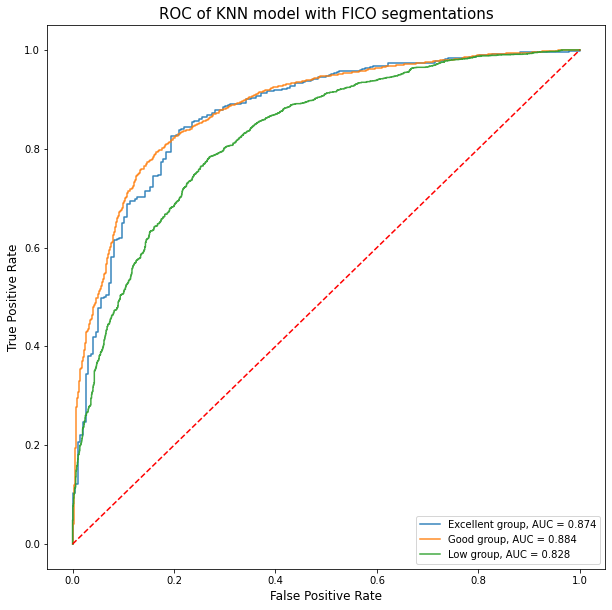

In [7]:
#Draw the ROC plot comparision
plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, label = 'Excellent group'+', AUC = %0.3f' % roc_auc1,alpha=0.9)
plt.plot(fpr2, tpr2, label = 'Good group'+', AUC = %0.3f' % roc_auc2,alpha=0.9)
plt.plot(fpr3, tpr3, label = 'Low group'+', AUC = %0.3f' % roc_auc3,alpha=0.9)
plt.plot([0,1],[0,1],"r--")
plt.legend(loc = 'lower right')
plt.title("ROC of KNN model with FICO segmentations",fontsize=15)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.show()

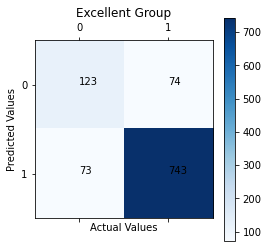

In [8]:
#Visualize the confusion matrix
cm1=confusion_matrix(test_y1-1, y_pred10-1)
cm2=confusion_matrix(test_y2-1, y_pred20-1)
cm3=confusion_matrix(test_y3-1, y_pred30-1)
plt.matshow(cm1,cmap=plt.cm.Blues)
plt.colorbar()
plt.annotate(cm1[0,1],xy=(0,1))
plt.annotate(cm1[1,1],xy=(1,1))
plt.annotate(cm1[0,0],xy=(0,0))
plt.annotate(cm1[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Excellent Group")
plt.show()

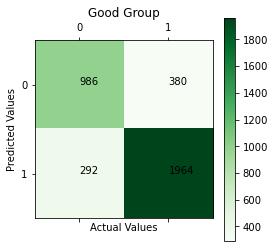

In [9]:
plt.matshow(cm2,cmap=plt.cm.Greens)
plt.colorbar()
plt.annotate(cm2[0,1],xy=(0,1))
plt.annotate(cm2[1,1],xy=(1,1))
plt.annotate(cm2[0,0],xy=(0,0))
plt.annotate(cm2[1,0],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Good Group")
plt.show()

[[1338 1556]
 [ 131  687]]
[[1338  131]
 [1556  687]]


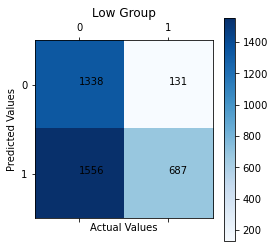

In [24]:
print(cm3)
tmp=cm3[0][1]
cm3[0][1]=cm3[1][0]
cm3[1][0]=tmp
print(cm3)
plt.matshow(cm3,cmap=plt.cm.Blues)
plt.colorbar()
plt.annotate(cm3[1,0],xy=(0,1))
plt.annotate(cm3[1,1],xy=(1,1))
plt.annotate(cm3[0,0],xy=(0,0))
plt.annotate(cm3[0,1],xy=(1,0))
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.title("Low Group")
plt.show()